In [38]:
import pandas as pd

# Load train dataset
train_df = pd.read_csv("data/train_set.csv")
print(train_df.head())

y_train = train_df['sentiment']
X_train = train_df['text']

# Load test dataset
test_df = pd.read_csv("data/test_set.csv")
print(test_df.head())

y_test = test_df['sentiment']
X_test = test_df['text']

                                                text  sentiment
0  clint eastwood play wound union soldier find g...          1
1  rent movie sound pretty interesting horror mov...          0
2  great example could great film great idea turn...          0
3  ok admit watch movie mystery science theater 3...          0
4  movie absolutely terrible not act awful sleep ...          0
                                                text  sentiment
0  attack killer tomato parody bad monster movie ...          0
1  pam grier star coffy nurse seek revenge drug d...          0
2  movie never imagine richard attenborough could...          1
3  patricia hunter oh professor also make habit c...          0
4  go generous give 3 live huntsville great see w...          0


# Feature Extraction (for ML models)

### Term Frequency - Inverse Document Frequency (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ML Models

In [44]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
def plot_valid_curves(train_scores, valid_scores, param_range, x_label, logx=False):
    # Calculate means and std devs
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    
    if logx:
        param_range=np.log(param_range)
    
    # Plot validation curves
    plt.plot(param_range, train_mean, color = 'blue', marker='o', 
             markersize=5, label='Training accuracy')
    plt.fill_between(param_range, train_mean + train_std, 
                     train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(param_range, valid_mean, color = 'green', linestyle='--', 
             marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(param_range, valid_mean + valid_std, 
                     valid_mean - valid_std, alpha=0.15, color='green')
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel(x_label)
    plt.ylabel('Accuracy')
    plt.show()

In [47]:
def eval_clf(clf, X_train, X_test, y_train, y_test):
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print('Training Accuracy Score: {0:.3f}'.format(train_acc))
    print('Test Accuracy Score: {0:.3f}'.format(test_acc))

    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Test)")
    plt.show()

### Logistic Regression

CV Accuracy: 0.884
Training Accuracy Score: 0.910
Test Accuracy Score: 0.884


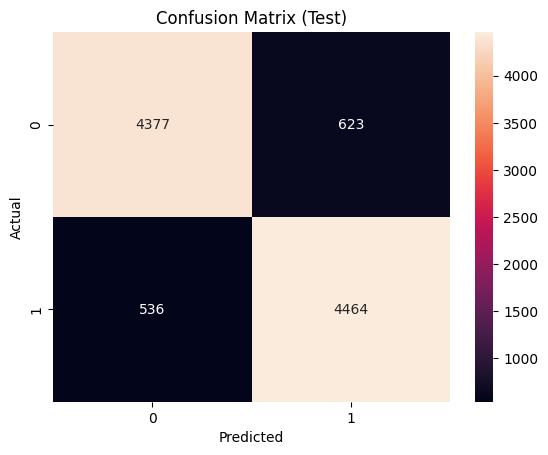

In [48]:
lr = LogisticRegression(max_iter=1000) # performs L2 regularisation as well
lr_scores = cross_validate(lr, X_train_vec, y_train, scoring='accuracy', cv=5)
lr_scores_mean = np.mean(lr_scores['test_score'])

print('CV Accuracy: {0:.3f}'.format(lr_scores_mean))

lr.fit(X_train_vec, y_train)
eval_clf(lr, X_train_vec, X_test_vec, y_train, y_test)


### Support Vector Machines

In [24]:
# Create samples
sample_frac = 0.1
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_vec, y_train, train_size=sample_frac, random_state=42)

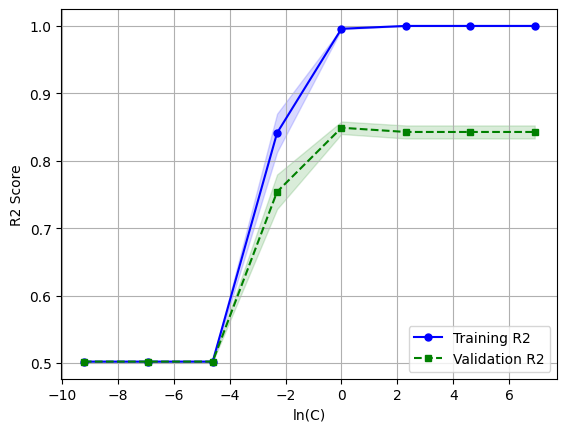

In [25]:
# Tune SVM - C
svc = SVC()

svm_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
svmc_train_scores1, svmc_valid_scores1 = validation_curve(estimator=svc, 
                                              X=X_train_sample, y=y_train_sample, 
                                              param_name='C',
                                              param_range=svm_param_range, cv=5)

# Plot validation curves - SVM (C)
plot_valid_curves(svmc_train_scores1, svmc_valid_scores1, svm_param_range, 'ln(C)', True)

In [26]:
# Get mean train and CV R2 at C = 1
print(np.mean(svmc_train_scores1, axis=1)[4])
print(np.mean(svmc_valid_scores1, axis=1)[4])

0.9958125000000001
0.849


Based on the validation curves, the optimal value for C in the SVM is 1, where validation R2 is maximised.

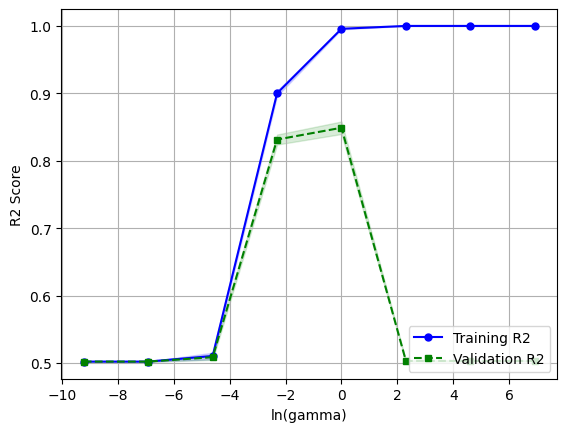

In [27]:
# Tune SVM - gamma
svmg_train_scores2, svmg_valid_scores2 = validation_curve(estimator=svc, 
                                              X=X_train_sample, y=y_train_sample, 
                                              param_name='gamma', 
                                              param_range=svm_param_range, cv=5)

# Plot validation curves - SVM (gamma)
plot_valid_curves(svmg_train_scores2, svmg_valid_scores2, svm_param_range, 'ln(gamma)', True)

In [32]:
# Get mean train and CV R2 at gamma = 1
print(np.mean(svmg_train_scores2, axis=1)[4])
print(np.mean(svmg_valid_scores2, axis=1)[4])

0.9957499999999999
0.849


In [29]:
# Tune SVM - degree
svm_param_degree = [2, 3, 4, 5]
svmg_train_scores3, svmg_valid_scores3 = validation_curve(estimator=svc, 
                                              X=X_train_sample, y=y_train_sample, 
                                              param_name='degree', 
                                              param_range=svm_param_degree, cv=5)

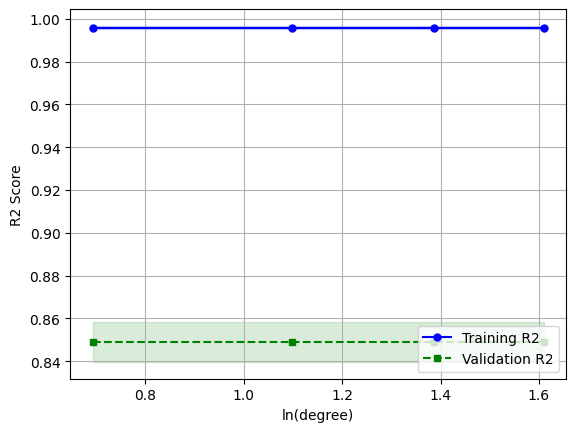

In [30]:
# Plot validation curves - SVM (degree)
plot_valid_curves(svmg_train_scores3, svmg_valid_scores3, svm_param_degree, 'ln(degree)', True)

In [36]:
# Get mean train and CV R2 at degree = 2
print(np.mean(svmg_train_scores3, axis=1)[0])
print(np.mean(svmg_valid_scores3, axis=1)[0])

0.9958125000000001
0.849


In [33]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]  # for 'poly' kernel
}

gs1 = GridSearchCV(estimator = svc, param_grid = param_grid, scoring = 'accuracy', cv=5)

gs1.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [34]:
print(gs1.best_score_)

0.849


In [35]:
print(gs1.best_params_)

{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
